<img src="../Images/DSC_Logo.png" style="width: 400px;">

# Time Series Theory in Python - Part 3: Time Series Preprocessing

This notebook presents several techniques for time series preprocessing, which are crucial for preparing data for analysis and predictive modeling. These techniques can serve as independent analyses on their own and facilitate further preprocessing tailored to specific prediction tasks.

In [29]:
pip install statsmodels PythonTsa statsmodels scikit-learn openpyxl seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [4]:
from PythonTsa.datadir import getdtapath
dtapath = getdtapath()

## 1. Smoothing

### **Example 1: Australian Employed Total Persons**

In [16]:
# Get the data file path
dtapath = getdtapath()

# Load the Excel file containing employment data
aul = pd.read_excel(dtapath + 'AustraliaEmployedTotalPersons.xlsx', header=0)

# Apply smoothing using a moving average
window_size = 12  # Define the window size for moving average (e.g., 12 for yearly smoothing)
y_smoothed = pd.Series(y).rolling(window=window_size, center=True).mean().values

# Plotting the results
plt.figure()
plt.scatter(aul.index, y, label='Original Data (Total Employed Persons)', color='gray', alpha=0.5)  # Original data
plt.plot(aul.index, y_smoothed, label='Smoothed Data (Moving Average)', color='blue', linewidth=2)  # Smoothed data

# Adding titles and labels
plt.title('Original and Smoothed Number of Employed Persons in Australia')
plt.xlabel('Date')
plt.ylabel('Number of Persons Employed')  # Clarified y-axis label
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

NameError: name 'y' is not defined

## 2. Detrending

The resulting detrended data represents the deviations from the trend. The values in the detrended series indicate how much each observation is above or below the trend line. 

### **Example 2: Mean Spring Passage Dates of European Pied Flycatcher**

The dataset contains the migration data of the European Pied Flycatcher, focusing on the adjusted mean spring passage dates (MADJDAYSWS) across multiple years. The dataset includes annual observations.

**Original dataset and code:** Haest, B., Hüppop, O., & Bairlein, F. (2020). Code and data for: "Weather at the winter and stopover areas determines spring migration onset, progress, and advancements in Afro-Palearctic migrant birds". In Proceedings of the National Academy of Sciences of the United States of America (v1.0, Bd. 117, Nummer 29, S. 17056–17062). Zenodo. doi:10.5281/zenodo.3629178              

**Related publication(s):** Haest, B., Hüppop, O., and Bairlein, F.: Weather at the winter and stopover areas determines spring migration onset, progress, and advancements in Afro-Palearctic migrant birds, Proceedings of the National Academy of Sciences, 117, 17056–17062, doi:10.1073/pnas.1920448117,              2020.

Original data and code were modified for this notebook.

In [6]:
bird_migration = pd.read_csv('../Datasets/bird_migration.csv', sep = ';')

Length of y: 55
Length of time: 55


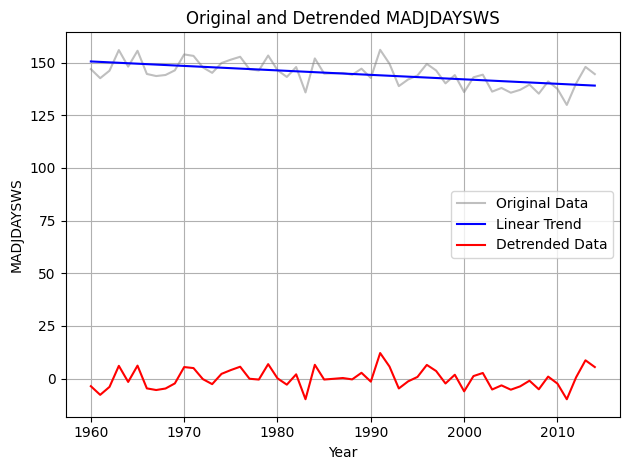

In [7]:
import statsmodels.api as sm

# Assuming the 'MADJDAYSWS' is the column you want as y
y2 = bird_migration['MADJDAYSWS'].values  # Extracting dependent variable
time2 = bird_migration['Year'].values  # Using the Year column as the time variable

# Checking the lengths
print(f'Length of y: {len(y2)}')
print(f'Length of time: {len(time2)}')

linear_model = sm.OLS(y2, sm.add_constant(time2)).fit()

# Perform linear detrending
trend = linear_model.fittedvalues  # This is the linear trend
detrended_y = y2 - trend

# Plot
plt.figure()
plt.plot(time2, y2, label='Original Data', color='gray', alpha=0.5)  # Original data
plt.plot(time2, trend, label='Linear Trend', color='blue', linewidth=1.5)  # Linear trend
plt.plot(time2, detrended_y, label='Detrended Data', color='red', linewidth=1.5)
plt.title('Original and Detrended MADJDAYSWS')
plt.xlabel('Year')
plt.ylabel('MADJDAYSWS')  # Optionally change to 'Detrended MADJDAYSWS'
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

## 3 Scaling

In [10]:
### scaling means subtracting the trend and then divided by the standard deviation

In [8]:
# prepare data for normalization
values = y2.reshape((len(y2), 1))

In [57]:
values

array([[146.9354839],
       [142.620438 ],
       [146.1842105],
       [155.9655172],
       [148.109375 ],
       [155.641791 ],
       [144.6261682],
       [143.6341463],
       [144.1367521],
       [146.3428571],
       [153.9      ],
       [153.2037037],
       [147.75     ],
       [145.1538462],
       [149.8192771],
       [151.4112903],
       [152.7875   ],
       [146.862069 ],
       [146.2658228],
       [153.375    ],
       [146.4177215],
       [143.2045455],
       [147.9047619],
       [135.8656716],
       [152.       ],
       [144.7966102],
       [144.9230769],
       [145.0862069],
       [144.2222222],
       [147.1384615],
       [142.7313433],
       [156.0943396],
       [149.48     ],
       [138.8541667],
       [142.0204082],
       [143.9047619],
       [149.3913043],
       [146.2758621],
       [140.1612903],
       [144.0967742],
       [136.       ],
       [143.0384615],
       [144.2884615],
       [136.24     ],
       [137.9791667],
       [13

(Reshaping on-dimensional data into a two-dimensional format before scaling is necessary because most preprocessing functions expect input data to have the shape of (n_samples, n_features). This ensures that the data is correctly interpreted as multiple samples of one or more features, allowing for proper scaling and processing during model training.)

## 3.1 Normalization

$$y = (x - min) / (max - min)$$

In [14]:
from sklearn.preprocessing import MinMaxScaler

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
print(normalized[:5])

# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
print(inversed[:5])

[[0.65022842]
 [0.48543924]
 [0.62153771]
 [0.99508034]
 [0.69505867]]
[[146.9354839]
 [142.620438 ]
 [146.1842105]
 [155.9655172]
 [148.109375 ]]


In [17]:
print("Min value normalized:", min(normalized))
print("Max value normalized:", max(normalized))

Min value normalized: [0.]
Max value normalized: [1.]


## 3.2 Standardization

$$y = (x - mean) / std$$

In [18]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)

# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
print(normalized[:5])
    
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
print(inversed[:5])

[[ 0.36591566]
 [-0.3843376 ]
 [ 0.23529241]
 [ 1.93595967]
 [ 0.57001908]]
[[146.9354839]
 [142.620438 ]
 [146.1842105]
 [155.9655172]
 [148.109375 ]]


In [19]:
print("Min value normalized:", min(normalized))
print("Max value normalized:", max(normalized))

Min value normalized: [-2.59444842]
Max value normalized: [1.95835791]


## 4. Outlier/Anomaly Detection

### **Example 3: Artificial Streamflow Time Series with Outliers and Change Point**

We create an artificial time series to simulate the dynamics of streamflow over a defined period while incorporating features like outliers and a change point. 

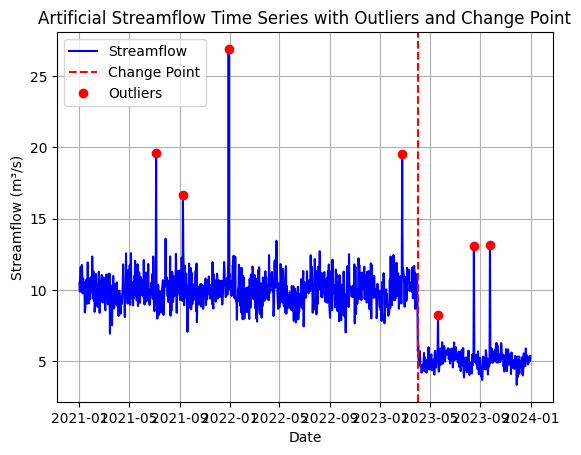

In [40]:
# Parameters
np.random.seed(42)  # For reproducibility
days = pd.date_range(start='2021-01-01', end='2023-12-31', freq='D')
n = len(days)

# Generate a normal streamflow pattern (in m³/s)
streamflow = 10 + 0.5 * np.sin(np.linspace(0, 20 * np.pi, n)) + np.random.normal(0, 1, n)

# Introduce a change point after 1.5 years (midway through the second year)
change_point_index = int(n * 0.75)
streamflow[change_point_index:] *= 0.5  # Effect of drying out

# Introduce a total of 7 random outliers
outliers_indices = np.random.choice(range(n), size=7, replace=False)
streamflow[outliers_indices] += np.random.normal(10, 5, size=7)  # Adding outliers above mean

# Create a DataFrame
data = pd.DataFrame(data={'Date': days, 'Streamflow (m³/s)': streamflow})

# Plot the time series
plt.figure()
plt.plot(data['Date'], data['Streamflow (m³/s)'], label='Streamflow', color='b')
plt.axvline(x=data['Date'][change_point_index], color='r', linestyle='--', label='Change Point')
plt.plot(data['Date'][outliers_indices], data['Streamflow (m³/s)'][outliers_indices], 'ro', label='Outliers')  # Mark all outliers in red
plt.title('Artificial Streamflow Time Series with Outliers and Change Point')
plt.xlabel('Date')
plt.ylabel('Streamflow (m³/s)')
plt.legend()
plt.grid()
plt.show()

## 4.1 Z-Score

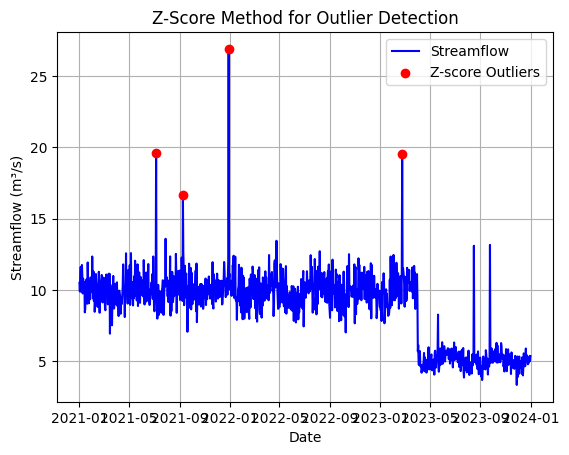

In [21]:
mean = np.mean(streamflow)
std_dev = np.std(streamflow)
z_scores = (streamflow - mean) / std_dev
outliers_z = np.where(np.abs(z_scores) > 3)[0]

plt.figure()
plt.plot(data['Date'], data['Streamflow (m³/s)'], label='Streamflow', color='b')
plt.scatter(data['Date'][outliers_z], streamflow[outliers_z], color='red', label='Z-score Outliers', zorder=5)
plt.title('Z-Score Method for Outlier Detection')
plt.xlabel('Date')
plt.ylabel('Streamflow (m³/s)')
plt.legend()
plt.grid()

## 4.2 Moving Average Method

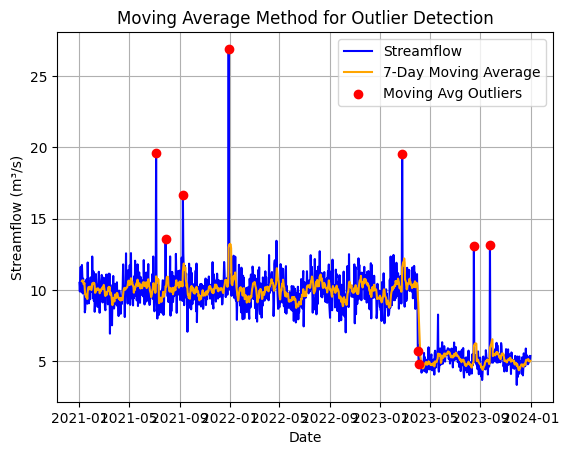

In [24]:
moving_average = pd.Series(streamflow).rolling(window=7).mean()
differences = np.abs(streamflow - moving_average)
outlier_threshold = differences.mean() + 3 * differences.std()  # Define threshold for outliers
outliers_moving_avg = np.where(differences > outlier_threshold)[0]

plt.figure()
plt.plot(data['Date'], streamflow, label='Streamflow', color='b')
plt.plot(data['Date'], moving_average, label='7-Day Moving Average', color='orange')
plt.scatter(data['Date'][outliers_moving_avg], streamflow[outliers_moving_avg], color='red', label='Moving Avg Outliers', zorder=5)
plt.title('Moving Average Method for Outlier Detection')
plt.xlabel('Date')
plt.ylabel('Streamflow (m³/s)')
plt.legend()
plt.grid()

## 4.3 Density-based Methods: DBSCAN

##### Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a clustering algorithm used to identify clusters in data based on their density

In [25]:
from sklearn.cluster import DBSCAN

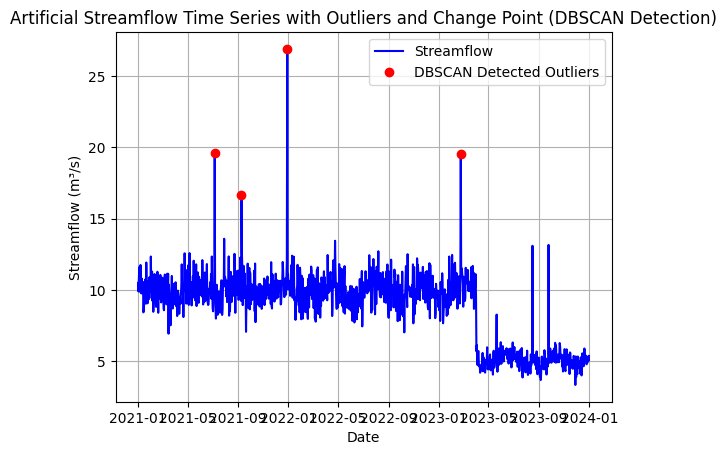

In [47]:
# DBSCAN Outlier Detection
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Streamflow (m³/s)']])  # Scale the data

# Fit DBSCAN (adjust eps and min_samples as needed)
dbscan = DBSCAN(eps=0.5, min_samples=10)  # eps controls the neighborhood radius, and min_samples controls density threshold
data['Outlier'] = dbscan.fit_predict(data_scaled)

# DBSCAN labels outliers as -1, so we mark them
dbscan_outliers = data[data['Outlier'] == -1]

# Plot the time series with outliers
plt.figure()
plt.plot(data['Date'], data['Streamflow (m³/s)'], label='Streamflow', color='b')
plt.plot(dbscan_outliers['Date'], dbscan_outliers['Streamflow (m³/s)'], 'ro', label='DBSCAN Detected Outliers')
plt.title('Artificial Streamflow Time Series with Outliers and Change Point (DBSCAN Detection)')
plt.xlabel('Date')
plt.ylabel('Streamflow (m³/s)')
plt.legend()
plt.grid()
plt.show()

## 5. Data Availability and Gaps

## 5.1 Data Availability in Time Series

### **Example 4: Large Dataset of Synthetic Time Series with Gaps**

We generate multiple synthetic independent time series with trend, seasonal effect, random noise AND gaps.

/tmp/ipykernel_299/149521833.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2000-01-01', periods=100, freq='M')


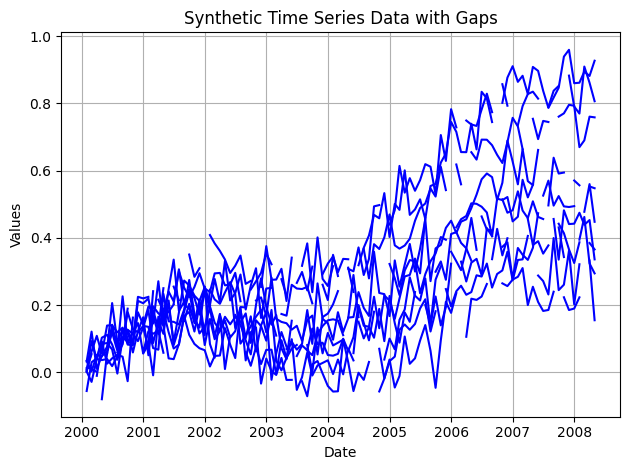

In [42]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic time series data
dates = pd.date_range('2000-01-01', periods=100, freq='M')

# Create a DataFrame to hold the time series
data_exp = pd.DataFrame(index=dates)

# Generate time series
n_series = 10
for i in range(1, n_series + 1):  # 24 time series
    trend = np.linspace(0, np.random.uniform(0.1, 1), len(dates))  # Linear trend
    seasonal = 0.1 * np.sin(np.linspace(0, 3 * np.pi, len(dates)))  # Seasonal effect
    noise = np.random.normal(loc=0, scale=0.05, size=len(dates))  # Random noise
    series = trend + seasonal + noise  # Combine to create the time series
    data_exp[f'Series_{i}'] = series

# Add gaps (missing values) to the series
num_gaps = 10  # Number of NaN values to insert in each series
for column in data_exp.columns:
    indices = np.random.choice(data_exp.index, num_gaps, replace=False)  # Select random indices
    data_exp.loc[indices, column] = np.nan  # Assign NaN values

# Plotting all the time series; highlight the last two series
plt.figure()
for column in data_exp.columns:
    plt.plot(data_exp.index, data_exp[column], label=column, color='blue')
plt.title('Synthetic Time Series Data with Gaps')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
plt.tight_layout()
plt.show()

          2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  \
Series_1           1           1           1           1           1   
Series_2           1           1           0           0           1   
Series_3           1           1           1           1           1   
Series_4           1           1           1           1           1   
Series_5           1           1           1           1           1   

          2000-06-30  2000-07-31  2000-08-31  2000-09-30  2000-10-31  ...  \
Series_1           1           1           1           1           1  ...   
Series_2           1           1           1           1           1  ...   
Series_3           1           1           1           1           1  ...   
Series_4           1           1           1           1           1  ...   
Series_5           1           1           1           1           0  ...   

          2007-07-31  2007-08-31  2007-09-30  2007-10-31  2007-11-30  \
Series_1           0           1

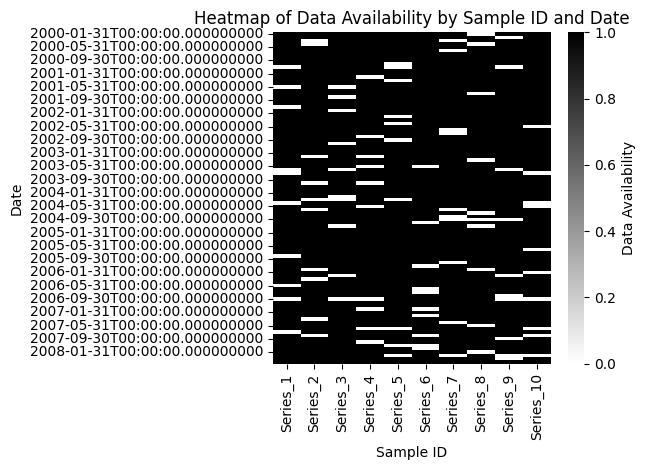

In [43]:
# prepare data for heatmap
heatmap_data = data_exp.notna().astype(int)  # Convert to binary (1 for available, 0 for NaN)
heatmap_data = heatmap_data.T
print(heatmap_data.head())

# plot heatmap
import seaborn as sns
plt.figure()  
sns.heatmap(heatmap_data.T, cmap='binary', cbar_kws={'label': 'Data Availability'}, annot=False)
plt.title("Heatmap of Data Availability by Sample ID and Date")
plt.xlabel("Sample ID")
plt.ylabel("Date")
plt.tight_layout()
plt.show()

## 5.2 Interpolation

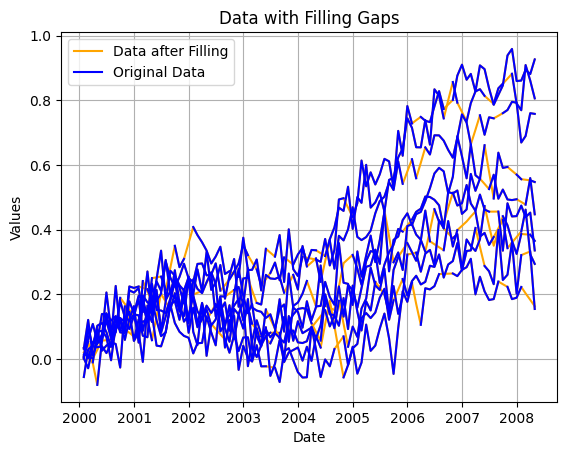

In [44]:
# Fill the gaps using linear interpolation
data_filled = data_exp.interpolate(method='linear')

# Plotting the original data and the filled data
plt.figure()
plt.plot(data_filled, label='Data after Filling', color='orange')
plt.plot(data_exp, label='Original Data', color='b')
plt.title('Data with Filling Gaps')
plt.xlabel('Date')
plt.ylabel('Values')
handles, labels = plt.gca().get_legend_handles_labels() # Create handles for the legend manually
by_label = dict(zip(labels, handles)) # Remove duplicates by turning the labels into a set and getting unique corresponding handles
plt.legend(by_label.values(), by_label.keys()) # Create the legend with unique entries
plt.grid()
plt.show()

### **Example 3 [continued]: Artificial Streamflow Time Series with Outliers and Change Point**

In [38]:
data.head()

,Series_1,Series_2,Series_3,Series_4,Series_5,Series_6,Series_7,Series_8,Series_9,Series_10
2000-01-31,-0.055594,0.012878,0.001197,0.034098,0.005743,0.002426,0.008530,NaN,0.020629,0.032274
2000-02-29,0.029866,0.013184,0.061994,0.002516,0.092809,-0.028440,0.053945,0.009645,NaN,0.121040
2000-03-31,0.041707,NaN,0.108578,0.052180,0.038904,0.039652,NaN,0.001629,-0.010396,0.010280
2000-04-30,0.091944,NaN,0.055216,0.047236,0.103056,0.036467,-0.080080,NaN,0.085163,0.049247
2000-05-31,0.025782,0.069782,0.139281,0.076109,0.111456,0.039626,0.056837,0.055184,0.086971,0.063123


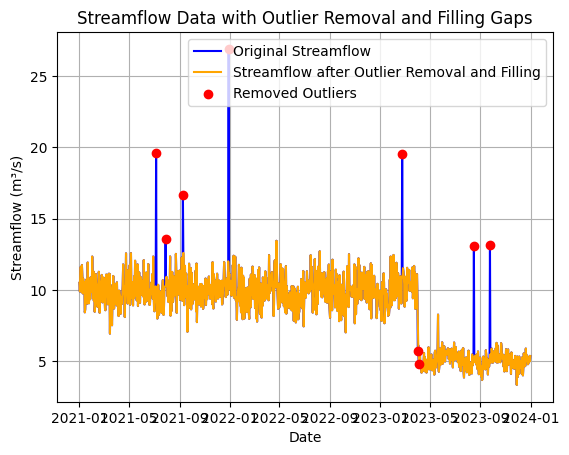

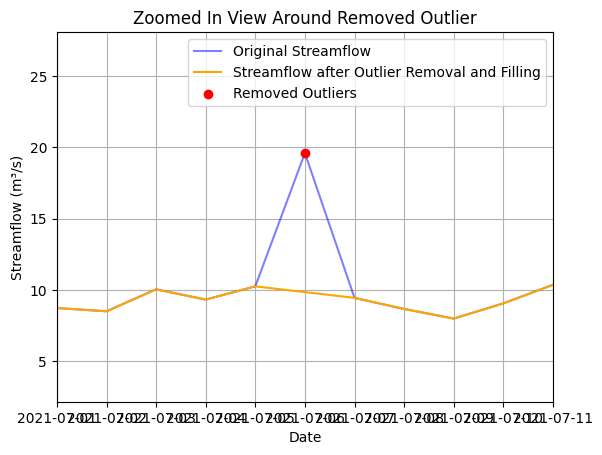

In [41]:
# Remove outliers from the data
filtered_streamflow = data['Streamflow (m³/s)'].copy()
filtered_streamflow[outliers_moving_avg] = np.nan  # Set outlier points to NaN

# Fill the gaps using linear interpolation
filled_streamflow = filtered_streamflow.interpolate(method='linear')

# Plotting the original data and the filled data
plt.figure()
plt.plot(data['Date'], data['Streamflow (m³/s)'], label='Original Streamflow', color='b')
plt.plot(data['Date'], filled_streamflow, label='Streamflow after Outlier Removal and Filling', color='orange')
plt.scatter(data['Date'][outliers_moving_avg], streamflow[outliers_moving_avg], color='red', label='Removed Outliers', zorder=5)
plt.title('Streamflow Data with Outlier Removal and Filling Gaps')
plt.xlabel('Date')
plt.ylabel('Streamflow (m³/s)')
plt.legend()
plt.grid()
plt.show()

# Zooming in on one of the removed outlier points (e.g., using the first outlier)
outlier_to_zoom = outliers_moving_avg[0]  # Choose an example outlier to zoom in
start_date = data['Date'][outlier_to_zoom - 5]  # 5 days before
end_date = data['Date'][outlier_to_zoom + 5]    # 5 days after

# zoomed-in
plt.figure()
plt.plot(data['Date'], data['Streamflow (m³/s)'], label='Original Streamflow', color='b', alpha=0.5)
plt.plot(data['Date'], filled_streamflow, label='Streamflow after Outlier Removal and Filling', color='orange')
plt.scatter(data['Date'][outliers_moving_avg], streamflow[outliers_moving_avg], color='red', label='Removed Outliers', zorder=5)
plt.xlim([start_date, end_date])
plt.title('Zoomed In View Around Removed Outlier')
plt.xlabel('Date')
plt.ylabel('Streamflow (m³/s)')
plt.legend()
plt.grid()
plt.show()

## 5.3 Reindexing

### **Example 4 [continued]: Large Dataset of Synthetic Time Series with Gaps**

## 5.3.1 Resampling

For aggregating existing values over defined time interval.

            Series_1  Series_2  Series_3  Series_4  Series_5  Series_6  \
2000-12-31  0.042668  0.114785  0.103435  0.103645  0.088283  0.062337   
2001-12-31  0.170859  0.220516  0.241693  0.240715  0.198759  0.127985   
2002-12-31  0.169094  0.243599  0.328496  0.274735  0.199544  0.132975   
2003-12-31  0.109823  0.228554  0.298843  0.285018  0.151057  0.070742   
2004-12-31  0.158758  0.345150  0.372624  0.388608  0.214891  0.103069   
2005-12-31  0.305643  0.471384  0.599760  0.553597  0.359331  0.227741   
2006-12-31  0.428488  0.657803  0.792088  0.747166  0.539481  0.370577   
2007-12-31  0.460178  0.745535  0.868771  0.815573  0.590159  0.394389   
2008-12-31  0.425608  0.719683  0.891137  0.836770  0.552292  0.368731   

            Series_7  Series_8  Series_9  Series_10  
2000-12-31  0.074724  0.079664  0.062885   0.087859  
2001-12-31  0.153207  0.166539  0.087155   0.160749  
2002-12-31  0.083795  0.183949  0.071701   0.115107  
2003-12-31  0.030453  0.129216 -0.008268   

/tmp/ipykernel_299/3305358146.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_results = data_exp.resample('Y').mean()


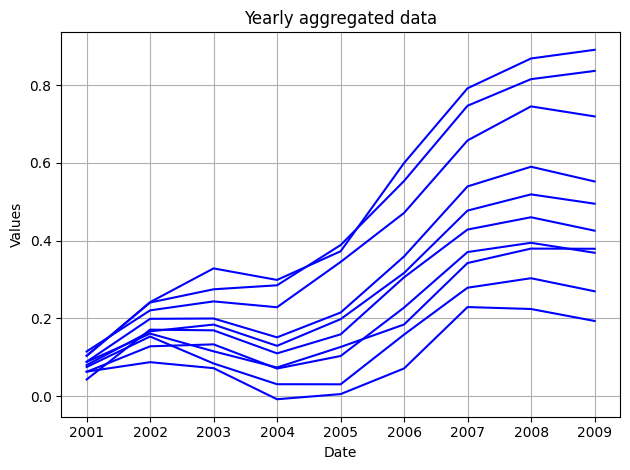

In [45]:
# Use resample to get yearly mean values
yearly_results = data_exp.resample('Y').mean()

# Example of accessing the yearly aggregated data
print(yearly_results)

# Plotting the original data and the filled data
plt.figure()
plt.plot(yearly_results, label='Original Data', color='b')
plt.title('Yearly aggregated data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
plt.tight_layout()
plt.show()

## 5.3.2 Interpolate & Select By Sequence

Focusing on estimating values at specific times where they might not exist.

In [53]:
series_data = data_exp

In [56]:
from scipy.interpolate import interp1d

# Sequence for interpolation (years from 2000 to 2009)
seq_interpol = np.arange(2000, 2010, 1)

# Create a new DataFrame for storing interpolated results
yearly_results = pd.DataFrame(index=seq_interpol)

# Interpolation for each column in the data DataFrame
for column in data.columns:
    
    # Reset index to access Year easily for each specific series
    series_data = data[column].reset_index()  # Create series_data inside the loop

    # Rename columns for clarity
    series_data.columns = ['Date', 'Values']

    # Convert Date to its years
    series_data['Year'] = series_data['Date'].dt.year
    
    # 1. Drop NaN values for interpolation
    series_data = series_data.dropna(subset=['Values'])
    
    # 2. Interpolate using linear interpolation
    # Ensure to use the 'Year' for interpolation
    f = interp1d(series_data['Year'], series_data['Values'], 
                 kind='linear', bounds_error=False, fill_value=np.nan)
    
    # 3. Get interpolated values for the predefined sequence
    interpolated_values = f(seq_interpol)

    # Store interpolated values in the yearly results DataFrame
    yearly_results[column] = interpolated_values

# Example of accessing the interpolated data
print(yearly_results)

# Plotting the original data and the filled data
plt.figure()
plt.plot(yearly_results, label='Original Data', color='b')
plt.title('Yearly aggregated data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
plt.tight_layout()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [54]:
series_data.head()

,Series_1,Series_2,Series_3,Series_4,Series_5,Series_6,Series_7,Series_8,Series_9,Series_10
2000-01-31,-0.055594,0.012878,0.001197,0.034098,0.005743,0.002426,0.008530,NaN,0.020629,0.032274
2000-02-29,0.029866,0.013184,0.061994,0.002516,0.092809,-0.028440,0.053945,0.009645,NaN,0.121040
2000-03-31,0.041707,NaN,0.108578,0.052180,0.038904,0.039652,NaN,0.001629,-0.010396,0.010280
2000-04-30,0.091944,NaN,0.055216,0.047236,0.103056,0.036467,-0.080080,NaN,0.085163,0.049247
2000-05-31,0.025782,0.069782,0.139281,0.076109,0.111456,0.039626,0.056837,0.055184,0.086971,0.063123
